<a href="https://colab.research.google.com/github/yashwanth-gundela/IBM-DataScience-capstone-project/blob/master/IBMCapstoneProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IBM Data Science Capstone Project**



*  **Introduction** 

---








As quoted in an article - <i>"What Food Tells Us About Culture"</i>

<i>"Traditional cuisine is passed down from one generation to the next. It also operates as an expression of cultural identity. Immigrants bring the food of their countries with them wherever they go and cooking traditional food is a way of preserving their culture when they move to new places."</i>

Undoubtedly, Food Diversity is an important part of an ethnically diverse metropolis. The idea of this project is to categorically segment the neighborhoods of Hyderabad City into major clusters and examine their cuisines. A desirable intention is to examine the neighborhood cluster's food habits and taste. Further examination might reveal if food has any relationship with the diversity of a neighborhood.

This project will help to understand the diversity of a neighborhood by leveraging venue data from Foursquare’s ‘Places API’ and ‘k-means clustering’ machine learning algorithm. Exploratory Data Analysis (EDA) will help to discover further about the culture and diversity of the neighborhood.
Stakeholders would be the one who are interested to use this quantifiable analysis to understand the distribution of different cultures and cuisines over Hyderabad. Also, this project can be utilized by a new food vendor who is willing to open his or her restaurant or by a government authority to examine and study the city's culture diversity better.



*   **Methodology**

---








<h3>Installing geocoder<h3>

In [0]:
!pip install geocoder

     |████████████████████████████████| 102kB 2.3MB/s 


<h3>Importing Libraries<h3>

In [0]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
import re

print("Libraries imported.")

Libraries imported.


<h3>Gathering the necessary data<h3>

In [0]:
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Hyderabad,_India").text

In [0]:
soup = BeautifulSoup(data, 'html.parser')

In [0]:
neighborhoodList = []
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)
hyd_df = pd.DataFrame({"Neighborhood": neighborhoodList})

hyd_df.head(10)

,Neighborhood
0,A. S. Rao Nagar
1,A.C. Guards
2,Abhyudaya Nagar
3,Abids
4,Adikmet
5,Afzal Gunj
6,Aghapura
7,"Aliabad, Hyderabad"
8,Alijah Kotla
9,Allwyn Colony


In [0]:
hyd_df.shape

(200, 1)

<h3>Using geocoder to get the latitudes and longitudes for our dataset<h3>

In [0]:
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Hyderabad, India'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [0]:
coords = [ get_latlng(neighborhood) for neighborhood in hyd_df["Neighborhood"].tolist() ]

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


In [0]:
coords[3:12]

[[17.389800000000037, 78.47658000000007],
 [17.410610000000077, 78.51513000000006],
 [17.37751000000003, 78.48005000000006],
 [17.387364823969637, 78.4669870622138],
 [17.34259000000003, 78.47626000000008],
 [17.36068000000006, 78.47998000000007],
 [17.503370000000075, 78.41602000000006],
 [17.535430000000076, 78.54427000000004],
 [17.385820000000024, 78.51836000000003]]

<h3>Appending the location data to our dataframe<h3>

In [0]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])# Converting the list to a dataframe

In [0]:
hyd_df['Latitude'] = df_coords['Latitude']
hyd_df['Longitude'] = df_coords['Longitude']

In [0]:
hyd_df.to_csv("hyd_df.csv", index=False)

In [0]:
hyd_df.head()

,Neighborhood,Latitude,Longitude
0,A. S. Rao Nagar,17.411200,78.508240
1,A.C. Guards,17.392977,78.456867
2,Abhyudaya Nagar,17.337650,78.564140
3,Abids,17.389800,78.476580
4,Adikmet,17.410610,78.515130


<h3>Using folium to plot the coordinates on a Hyderabad map<h3>

In [0]:
# Extracting the list
llist=hyd_df[['Latitude','Longitude']].values.tolist()
llist[:10]

[[17.411200000000065, 78.50824000000006],
 [17.392977027745946, 78.45686724051741],
 [17.337650000000053, 78.56414000000007],
 [17.389800000000037, 78.47658000000007],
 [17.410610000000077, 78.51513000000006],
 [17.37751000000003, 78.48005000000006],
 [17.387364823969637, 78.4669870622138],
 [17.34259000000003, 78.47626000000008],
 [17.36068000000006, 78.47998000000007],
 [17.503370000000075, 78.41602000000006]]

In [0]:
map = folium.Map(location=[17.3850,78.4867],zoom_start=11)
for point in range(0, len(llist)):
    folium.Marker(llist[point], popup=hyd_df['Neighborhood'][point],).add_to(map)
map

<h3>Using Foursquare API to get the venue information<h3>

In [0]:
CLIENT_ID = 'N1TS3FIUG3ZC3Z4SMBXOADRNCJZU24NW4BTFNXP5RB2HNMOM' # your Foursquare ID
CLIENT_SECRET = '1X3TQHWRWJPVKSWMSW4SNWMOF14LCEUZJZUGZ13DTPNKNHLC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [0]:
LIMIT = 100
radius = 2000
venues = []

for lat, longi, neighborhood in zip(hyd_df['Latitude'], hyd_df['Longitude'], hyd_df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        longi,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            longi, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [0]:
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)

venues_df.to_csv("venues_df.csv",index=False)

(6750, 7)


In [0]:
venues_df.head()

,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,A. S. Rao Nagar,17.4112,78.50824,Bawarchi,17.406369,78.497662,Indian Restaurant
1,A. S. Rao Nagar,17.4112,78.50824,Sudharshan Theatre 35mm,17.406530,78.495150,Movie Theater
2,A. S. Rao Nagar,17.4112,78.50824,Subway,17.404173,78.514950,Sandwich Place
3,A. S. Rao Nagar,17.4112,78.50824,Devi 70 MM,17.406329,78.495409,Movie Theater
4,A. S. Rao Nagar,17.4112,78.50824,Spencer's,17.412592,78.498400,Convenience Store


<h3>Creating a Category list to extract an only restaurant list<h3>

In [0]:
cat_list=venues_df['VenueCategory'].unique()
type(cat_list)
cat_list[:20]

array(['Indian Restaurant', 'Movie Theater', 'Sandwich Place',
       'Convenience Store', 'Ice Cream Shop', 'Coffee Shop', 'Café',
       'Asian Restaurant', 'Clothing Store', 'Electronics Store',
       'Train Station', 'Flea Market', 'Bakery', 'Hyderabadi Restaurant',
       'Juice Bar', 'Lounge', 'South Indian Restaurant', 'Park', 'Bistro',
       'Science Museum'], dtype=object)

In [0]:
rest_list=[]
for x in cat_list:
  if x.find('Place')!=-1 or x.find('Restaurant')!=-1 or x.find('Joint')!=-1 or x.find('Buffet')!=-1 or x.find('Spot')!=-1:
    rest_list.append(x)
rest_list.extend(['Indian Sweet Shop','Cafeteria','Frozen Yogurt Shop','Cupcake Shop','Food Stand','Café'])
rest_list=np.array(rest_list)
rest_list

array(['Indian Restaurant', 'Sandwich Place', 'Asian Restaurant',
       'Hyderabadi Restaurant', 'South Indian Restaurant', 'Snack Place',
       'Middle Eastern Restaurant', 'Vegetarian / Vegan Restaurant',
       'Fast Food Restaurant', 'Pizza Place', 'Fried Chicken Joint',
       'Restaurant', 'Chaat Place', 'Burger Joint', 'Chinese Restaurant',
       'Breakfast Spot', 'Italian Restaurant', 'BBQ Joint',
       'American Restaurant', 'Thai Restaurant', 'Bengali Restaurant',
       'Rajasthani Restaurant', 'Mediterranean Restaurant',
       'Ethiopian Restaurant', 'Afghan Restaurant', 'Falafel Restaurant',
       'New American Restaurant', 'Parsi Restaurant',
       'North Indian Restaurant', 'Multicuisine Indian Restaurant',
       'Greek Restaurant', 'Wings Joint', 'French Restaurant', 'Buffet',
       'Comfort Food Restaurant', 'Mexican Restaurant',
       'Hunan Restaurant', 'Tex-Mex Restaurant', 'Dumpling Restaurant',
       'Fondue Restaurant', 'Hot Dog Joint', 'Andhra Restaur

<h3>Extracting rows from the dataframe using the restaurant list created above<h3>

In [0]:
bool_list=[]

for index,rows in venues_df.iterrows():
  if rows['VenueCategory'] in rest_list:
    bool_list.append(True)
  else:
    bool_list.append(False)
bool_list=np.array(bool_list)
len(bool_list)

6750

In [0]:
rest_df=venues_df[bool_list]
rest_df.reset_index(inplace = True, drop = True)
rest_df.head()
rest_df.to_csv('rest_df.csv',index=False)

In [0]:
rest_df.head()

,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,A. S. Rao Nagar,17.4112,78.50824,Bawarchi,17.406369,78.497662,Indian Restaurant
1,A. S. Rao Nagar,17.4112,78.50824,Subway,17.404173,78.514950,Sandwich Place
2,A. S. Rao Nagar,17.4112,78.50824,Daily Bread,17.403554,78.514961,Café
3,A. S. Rao Nagar,17.4112,78.50824,Crystal Restaurant,17.406608,78.496268,Asian Restaurant
4,A. S. Rao Nagar,17.4112,78.50824,Astoria Restaurant,17.406530,78.497136,Indian Restaurant


<h3>Analysing Each Neighbourhood<h3>

In [0]:
hyd_onehot = pd.get_dummies(rest_df[['VenueCategory']], prefix="", prefix_sep="")
hyd_onehot.head()

,Afghan Restaurant,American Restaurant,Andhra Restaurant,Asian Restaurant,BBQ Joint,Bengali Restaurant,Breakfast Spot,Buffet,Burger Joint,Cafeteria,Café,Chaat Place,Chinese Restaurant,Comfort Food Restaurant,Cupcake Shop,Dumpling Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fondue Restaurant,Food Stand,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Greek Restaurant,Hot Dog Joint,Hunan Restaurant,Hyderabadi Restaurant,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Multicuisine Indian Restaurant,New American Restaurant,North Indian Restaurant,Parsi Restaurant,Pizza Place,Rajasthani Restaurant,Restaurant,Sandwich Place,Snack Place,South Indian Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
hyd_onehot['Neighborhood'] = rest_df['Neighborhood'] 
hyd_onehot.head()

,Afghan Restaurant,American Restaurant,Andhra Restaurant,Asian Restaurant,BBQ Joint,Bengali Restaurant,Breakfast Spot,Buffet,Burger Joint,Cafeteria,Café,Chaat Place,Chinese Restaurant,Comfort Food Restaurant,Cupcake Shop,Dumpling Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fondue Restaurant,Food Stand,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Greek Restaurant,Hot Dog Joint,Hunan Restaurant,Hyderabadi Restaurant,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Multicuisine Indian Restaurant,New American Restaurant,North Indian Restaurant,Parsi Restaurant,Pizza Place,Rajasthani Restaurant,Restaurant,Sandwich Place,Snack Place,South Indian Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Wings Joint,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A. S. Rao Nagar
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,A. S. Rao Nagar
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A. S. Rao Nagar
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A. S. Rao Nagar
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A. S. Rao Nagar


In [0]:
# move neighborhood column to the first column
Neighborhood = hyd_onehot['Neighborhood']

hyd_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
hyd_onehot.insert(0, 'Neighborhood', Neighborhood)

hyd_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Andhra Restaurant,Asian Restaurant,BBQ Joint,Bengali Restaurant,Breakfast Spot,Buffet,Burger Joint,Cafeteria,Café,Chaat Place,Chinese Restaurant,Comfort Food Restaurant,Cupcake Shop,Dumpling Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fondue Restaurant,Food Stand,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Greek Restaurant,Hot Dog Joint,Hunan Restaurant,Hyderabadi Restaurant,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Multicuisine Indian Restaurant,New American Restaurant,North Indian Restaurant,Parsi Restaurant,Pizza Place,Rajasthani Restaurant,Restaurant,Sandwich Place,Snack Place,South Indian Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
0,A. S. Rao Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,A. S. Rao Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,A. S. Rao Nagar,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A. S. Rao Nagar,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,A. S. Rao Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
hyd_onehot.shape

(3069, 49)

<h3> Grouping rows by neighborhood and by taking the adding the frequency of occurrence of each category<h3>

In [0]:
venue_counts = hyd_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)

,Afghan Restaurant,American Restaurant,Andhra Restaurant,Asian Restaurant,BBQ Joint,Bengali Restaurant,Breakfast Spot,Buffet,Burger Joint,Cafeteria,Café,Chaat Place,Chinese Restaurant,Comfort Food Restaurant,Cupcake Shop,Dumpling Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fondue Restaurant,Food Stand,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Greek Restaurant,Hot Dog Joint,Hunan Restaurant,Hyderabadi Restaurant,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Multicuisine Indian Restaurant,New American Restaurant,North Indian Restaurant,Parsi Restaurant,Pizza Place,Rajasthani Restaurant,Restaurant,Sandwich Place,Snack Place,South Indian Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A. S. Rao Nagar,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
A.C. Guards,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,2,7,0,0,0,0,1,0,0,0,0,3,0,1,0,2,2,0,0,1,0
Abhyudaya Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
Abids,0,0,0,0,0,0,1,0,1,0,3,1,4,0,0,0,0,0,5,0,0,0,1,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,2,0,3,2,2,2,0,0,0,0
Adikmet,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


<h3>Displaying the top 10 venues based on the Description of the dataframe<h3>

In [0]:
venue_counts_described = venue_counts.describe().transpose()

In [0]:
venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Indian Restaurant,192.0,4.651042,4.384420,0.0,1.0,3.0,8.00,18.0
Café,192.0,1.802083,2.047191,0.0,0.0,1.0,3.00,9.0
Fast Food Restaurant,192.0,1.598958,1.804764,0.0,0.0,1.0,2.25,7.0
Italian Restaurant,192.0,0.281250,0.788705,0.0,0.0,0.0,0.00,6.0
Restaurant,192.0,0.843750,1.226480,0.0,0.0,0.0,1.25,6.0
Vegetarian / Vegan Restaurant,192.0,0.432292,0.853449,0.0,0.0,0.0,1.00,5.0
Sandwich Place,192.0,0.588542,0.982823,0.0,0.0,0.0,1.00,5.0
Chinese Restaurant,192.0,0.864583,1.381401,0.0,0.0,0.0,1.00,5.0
Pizza Place,192.0,1.156250,1.133295,0.0,0.0,1.0,2.00,5.0
Asian Restaurant,192.0,0.421875,0.712007,0.0,0.0,0.0,1.00,4.0


<h3>Plotting the top 10 Venues of the top 10 categories<h3>




In [0]:
venue_top10_list = venue_top10.index.values.tolist()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


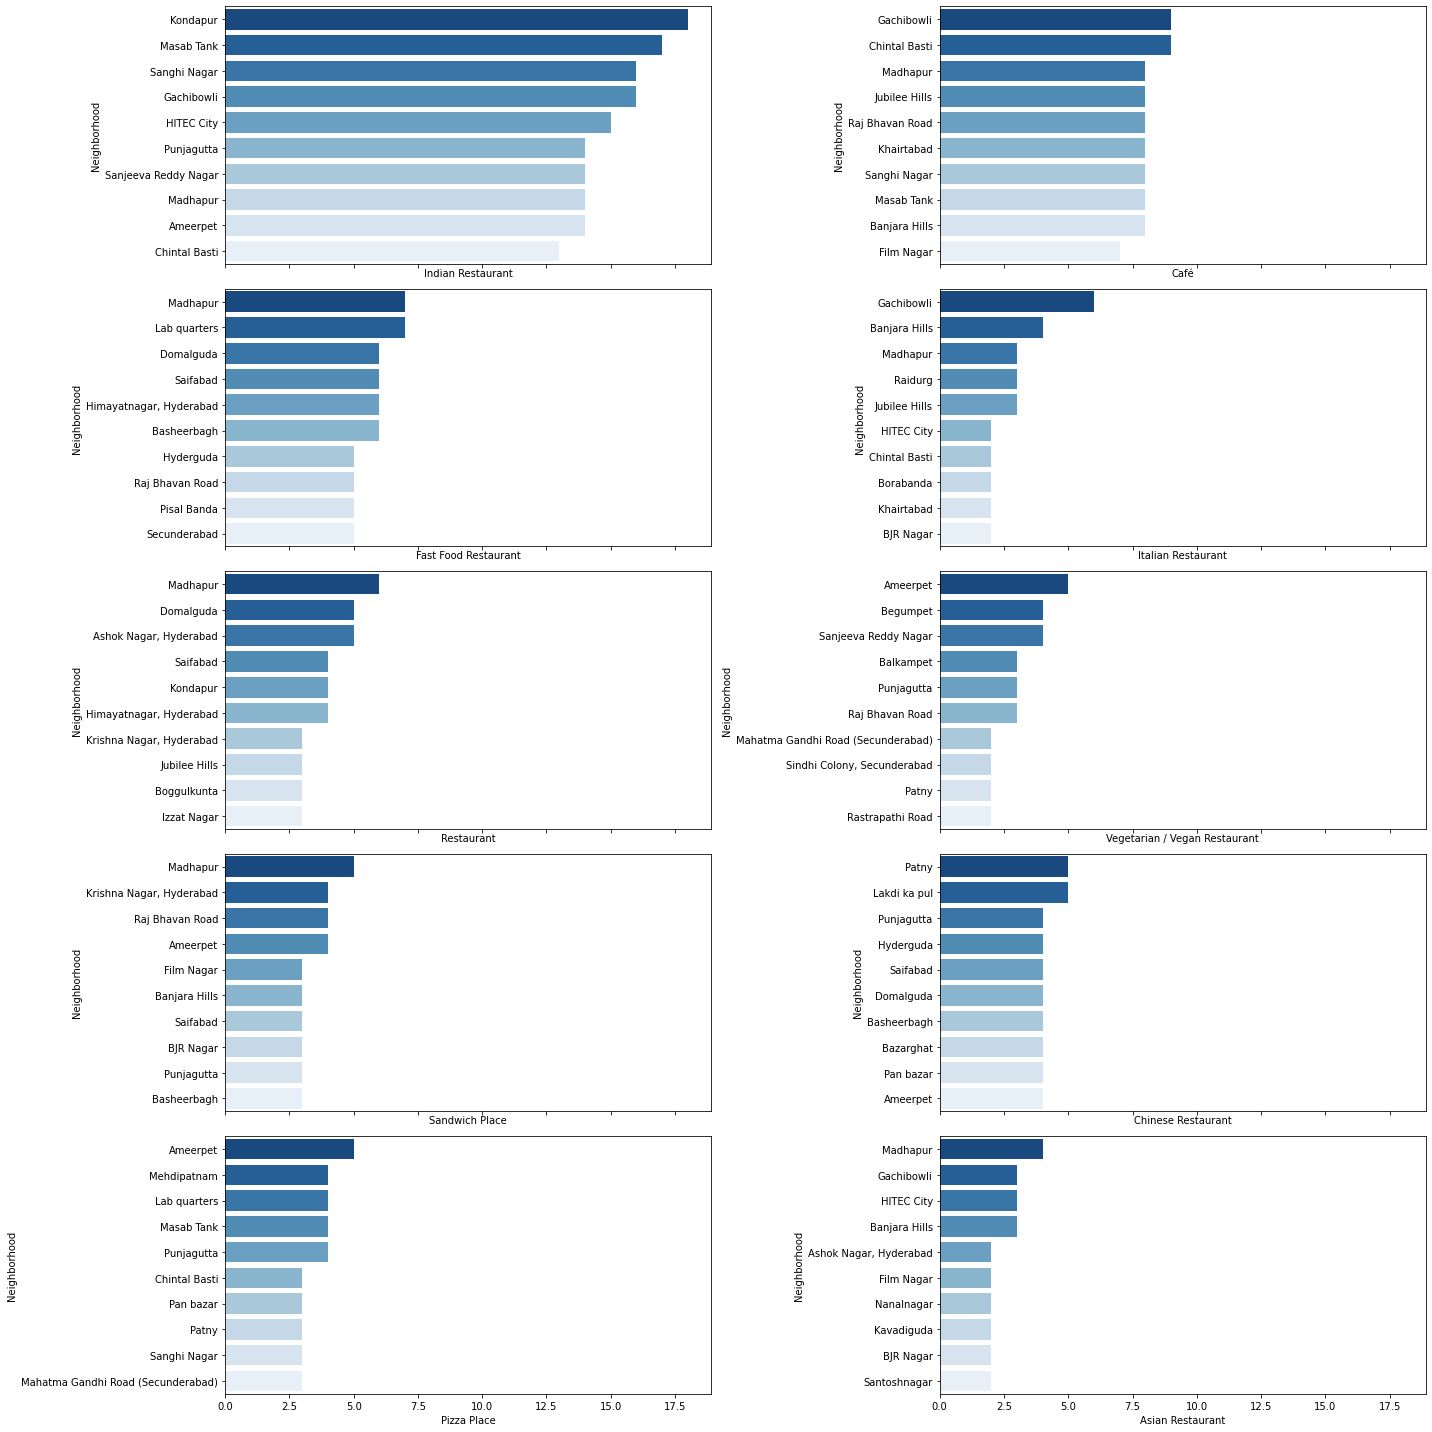

In [0]:
# Plotting the top 10 places of each category
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();

<h3>Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category<h3>

In [0]:
hyd_grouped = hyd_onehot.groupby('Neighborhood').mean().reset_index()
hyd_grouped.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Andhra Restaurant,Asian Restaurant,BBQ Joint,Bengali Restaurant,Breakfast Spot,Buffet,Burger Joint,Cafeteria,Café,Chaat Place,Chinese Restaurant,Comfort Food Restaurant,Cupcake Shop,Dumpling Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fondue Restaurant,Food Stand,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Greek Restaurant,Hot Dog Joint,Hunan Restaurant,Hyderabadi Restaurant,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Multicuisine Indian Restaurant,New American Restaurant,North Indian Restaurant,Parsi Restaurant,Pizza Place,Rajasthani Restaurant,Restaurant,Sandwich Place,Snack Place,South Indian Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
0,A. S. Rao Nagar,0.0,0.0,0.0,0.111111,0.0,0.0,0.000000,0.0,0.000000,0.0,0.111111,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.666667,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.111111,0.000000,0.000000,0.0,0.0,0.00,0.0
1,A.C. Guards,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.120000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.080000,0.0,0.0,0.0,0.040000,0.0,0.0,0.0,0.0,0.08,0.280000,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.120000,0.0,0.040000,0.000000,0.080000,0.080000,0.0,0.0,0.04,0.0
2,Abhyudaya Nagar,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.250000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.250000,0.0,0.250000,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0
3,Abids,0.0,0.0,0.0,0.000000,0.0,0.0,0.027027,0.0,0.027027,0.0,0.081081,0.027027,0.108108,0.0,0.0,0.0,0.0,0.0,0.135135,0.0,0.0,0.0,0.027027,0.0,0.0,0.0,0.0,0.00,0.270270,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.054054,0.0,0.081081,0.054054,0.054054,0.054054,0.0,0.0,0.00,0.0
4,Adikmet,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.125000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.750000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.125000,0.000000,0.000000,0.0,0.0,0.00,0.0


In [0]:
hyd_grouped.shape

(192, 49)

<h3>function to sort the venues in descending order<h3>

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [0]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))    

In [0]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = hyd_grouped['Neighborhood']

In [0]:
for ind in np.arange(hyd_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hyd_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,A. S. Rao Nagar,Indian Restaurant,Café,Asian Restaurant,Sandwich Place,Chinese Restaurant
1,A.C. Guards,Indian Restaurant,Café,Pizza Place,Fast Food Restaurant,South Indian Restaurant
2,Abhyudaya Nagar,Fast Food Restaurant,Indian Restaurant,Restaurant,Pizza Place,Wings Joint
3,Abids,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Café,Restaurant
4,Adikmet,Indian Restaurant,Café,Sandwich Place,Chaat Place,Food Stand


<h3>Cluster Neighborhoods<h3>
<h6>Running k-means to count Neighborhoods for each cluster label for variable cluster size<h6>




In [0]:
hyd_grouped_clustering = hyd_grouped.drop('Neighborhood', 1)

<h3>Determining the optimal number of clusters for k-means clustering using<h3><br>

---



<h3><b>The Silhouette Method<b> <h3>

In [0]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,50)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(hyd_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(hyd_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

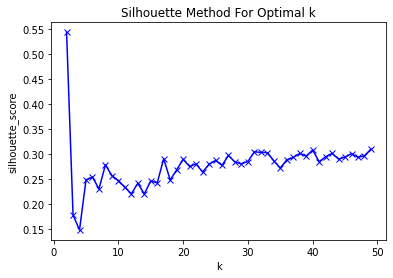

In [0]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

**We can see that there is a peak at 6 and 8. Let's take 8 as it has a higher K value compared to 6.**

# <h3>Taking the Number of clusters = 8<h3>

In [0]:
from collections import Counter
kclusters = 8

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(hyd_grouped_clustering)

print(Counter(kmeans.labels_))

Counter({6: 119, 1: 45, 0: 14, 2: 5, 4: 3, 3: 2, 7: 2, 5: 2})


<h4>creating a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood<h4>

In [0]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

neighborhoods_venues_sorted.head(5)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,A. S. Rao Nagar,Indian Restaurant,Café,Asian Restaurant,Sandwich Place,Chinese Restaurant
1,6,A.C. Guards,Indian Restaurant,Café,Pizza Place,Fast Food Restaurant,South Indian Restaurant
2,1,Abhyudaya Nagar,Fast Food Restaurant,Indian Restaurant,Restaurant,Pizza Place,Wings Joint
3,6,Abids,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Café,Restaurant
4,0,Adikmet,Indian Restaurant,Café,Sandwich Place,Chaat Place,Food Stand


In [0]:
# merge neighborhoods_venues_sorted with nyc_data to add latitude/longitude for each neighborhood
hyd_merged = neighborhoods_venues_sorted.join(hyd_df.set_index('Neighborhood'), on='Neighborhood')
hyd_merged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
0,0,A. S. Rao Nagar,Indian Restaurant,Café,Asian Restaurant,Sandwich Place,Chinese Restaurant,17.411200,78.508240
1,6,A.C. Guards,Indian Restaurant,Café,Pizza Place,Fast Food Restaurant,South Indian Restaurant,17.392977,78.456867
2,1,Abhyudaya Nagar,Fast Food Restaurant,Indian Restaurant,Restaurant,Pizza Place,Wings Joint,17.337650,78.564140
3,6,Abids,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Café,Restaurant,17.389800,78.476580
4,0,Adikmet,Indian Restaurant,Café,Sandwich Place,Chaat Place,Food Stand,17.410610,78.515130


<h3>Finally, let's visualize the resulting clusters<h3>

In [0]:
map_clusters = folium.Map(location=[17.3850,78.4867], zoom_start=11)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hyd_merged['Latitude'], hyd_merged['Longitude'], hyd_merged['Neighborhood'], hyd_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



*   **Final Result**

---







In [0]:
required_column_indices = [2,3]
required_column = [list(hyd_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [2,3]

**Cluster 0**

In [0]:
cluster_0 = hyd_merged.loc[hyd_merged['Cluster Labels'] == 0, hyd_merged.columns[1:12]]
cluster_0.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
0,A. S. Rao Nagar,Indian Restaurant,Café,Asian Restaurant,Sandwich Place,Chinese Restaurant,17.411200,78.508240
4,Adikmet,Indian Restaurant,Café,Sandwich Place,Chaat Place,Food Stand,17.410610,78.515130
18,"BHEL Township, Hyderabad",Indian Restaurant,BBQ Joint,Wings Joint,Chinese Restaurant,Food Stand,17.505990,78.304540
50,ECIL 'X' Roads,Indian Restaurant,Wings Joint,Fried Chicken Joint,Food Stand,Fondue Restaurant,17.252669,78.378976
65,Hasmathpet,Indian Restaurant,Café,Wings Joint,Chinese Restaurant,Food Stand,17.482200,78.486050


In [0]:
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

Indian Restaurant    14
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Café                    5
Wings Joint             4
BBQ Joint               1
Fast Food Restaurant    1
Italian Restaurant      1
Sandwich Place          1
Chinese Restaurant      1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
17.252669    2
17.411200    2
17.533180    1
17.410610    1
17.426160    1
17.455470    1
17.416630    1
17.482200    1
17.583190    1
17.505990    1
17.505360    1
17.378930    1
Name: Latitude, dtype: int64
---------------------------------------------


**Cluster 1**

In [0]:
cluster_1 = hyd_merged.loc[hyd_merged['Cluster Labels'] == 1, hyd_merged.columns[1:12]]
cluster_1.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
2,Abhyudaya Nagar,Fast Food Restaurant,Indian Restaurant,Restaurant,Pizza Place,Wings Joint,17.33765,78.56414
9,Allwyn Colony,Indian Restaurant,Fast Food Restaurant,Pizza Place,Middle Eastern Restaurant,BBQ Joint,17.50337,78.41602
11,Amberpet,Café,Indian Restaurant,Pizza Place,Fast Food Restaurant,Breakfast Spot,17.38582,78.51836
19,BJR Nagar,Café,Indian Restaurant,Sandwich Place,Pizza Place,Multicuisine Indian Restaurant,17.41257,78.40519
22,Bairamalguda,Fast Food Restaurant,South Indian Restaurant,Indian Restaurant,Pizza Place,Wings Joint,17.33992,78.54553


In [0]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

Café                         12
Fast Food Restaurant         10
Indian Restaurant             7
Pizza Place                   6
Middle Eastern Restaurant     3
Breakfast Spot                2
Food Stand                    2
Asian Restaurant              1
Italian Restaurant            1
South Indian Restaurant       1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Fast Food Restaurant             10
Indian Restaurant                10
Café                              5
BBQ Joint                         3
Pizza Place                       3
South Indian Restaurant           2
Wings Joint                       2
Afghan Restaurant                 2
Breakfast Spot                    1
Snack Place                       1
Restaurant                        1
Asian Restaurant                  1
Vegetarian / Vegan Restaurant     1
Fondue Restaurant                 1
Middle Eastern Restaurant         1
Chinese Restaurant                1
Name: 2nd Most C

**Cluster 2**

In [0]:
cluster_2 = hyd_merged.loc[hyd_merged['Cluster Labels'] == 2, hyd_merged.columns[1:12]]
cluster_2.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
124,Miyapur,Pizza Place,Wings Joint,Chaat Place,Food Stand,Fondue Restaurant,17.421020,78.582440
144,Neredmet,Pizza Place,Wings Joint,Chaat Place,Food Stand,Fondue Restaurant,17.477177,78.528479
145,Nizampet,Pizza Place,Wings Joint,Chaat Place,Food Stand,Fondue Restaurant,17.518330,78.381860
164,"Ramachandrapuram, Medak district",Pizza Place,Wings Joint,Chaat Place,Food Stand,Fondue Restaurant,17.511590,78.294310
175,Sainikpuri,Pizza Place,Wings Joint,Chaat Place,Food Stand,Fondue Restaurant,17.477177,78.528479


In [0]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place    5
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Wings Joint    5
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
17.477177    2
17.421020    1
17.511590    1
17.518330    1
Name: Latitude, dtype: int64
---------------------------------------------


**Cluster 3**

In [0]:
cluster_3 = hyd_merged.loc[hyd_merged['Cluster Labels'] == 3, hyd_merged.columns[1:12]]
cluster_3.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
15,Attapur,Fast Food Restaurant,Wings Joint,Vegetarian / Vegan Restaurant,French Restaurant,Food Stand,17.36917,78.43683
165,Ramanthapur,Fast Food Restaurant,Wings Joint,Vegetarian / Vegan Restaurant,French Restaurant,Food Stand,17.39032,78.54544


In [0]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

Fast Food Restaurant    2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Wings Joint    2
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
17.39032    1
17.36917    1
Name: Latitude, dtype: int64
---------------------------------------------


**Cluster 4**

In [0]:
cluster_4 = hyd_merged.loc[hyd_merged['Cluster Labels'] == 4, hyd_merged.columns[1:12]]
cluster_4.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
10,Alwal,Asian Restaurant,Wings Joint,Chinese Restaurant,French Restaurant,Food Stand,17.53543,78.54427
79,Karmanghat,Asian Restaurant,Wings Joint,Chinese Restaurant,French Restaurant,Food Stand,17.34061,78.53258
85,"Kings Colony, Shastripuram",Asian Restaurant,Wings Joint,Chinese Restaurant,French Restaurant,Food Stand,17.32598,78.44735


In [0]:
for col in required_column:
    print(cluster_4[col].value_counts(ascending = False))
    print("---------------------------------------------")

Asian Restaurant    3
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Wings Joint    3
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
17.32598    1
17.34061    1
17.53543    1
Name: Latitude, dtype: int64
---------------------------------------------


**Cluster 5**

In [0]:
cluster_5 = hyd_merged.loc[hyd_merged['Cluster Labels'] == 5, hyd_merged.columns[1:12]]
cluster_5.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
92,Kushaiguda,Snack Place,Wings Joint,Chaat Place,Food Stand,Fondue Restaurant,17.481130,78.583700
123,Mir Alam Tank,Snack Place,Wings Joint,Chaat Place,Food Stand,Fondue Restaurant,17.355109,78.454123


In [0]:
for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print("---------------------------------------------")

Snack Place    2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Wings Joint    2
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
17.481130    1
17.355109    1
Name: Latitude, dtype: int64
---------------------------------------------


**Cluster 6**

In [0]:
cluster_6 = hyd_merged.loc[hyd_merged['Cluster Labels'] == 6, hyd_merged.columns[1:12]]
cluster_6.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
1,A.C. Guards,Indian Restaurant,Café,Pizza Place,Fast Food Restaurant,South Indian Restaurant,17.392977,78.456867
3,Abids,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Café,Restaurant,17.389800,78.476580
5,Afzal Gunj,Indian Restaurant,South Indian Restaurant,Café,Fast Food Restaurant,Pizza Place,17.377510,78.480050
6,Aghapura,Indian Restaurant,South Indian Restaurant,Café,Fast Food Restaurant,Hyderabadi Restaurant,17.387365,78.466987
7,"Aliabad, Hyderabad",Indian Restaurant,Snack Place,Breakfast Spot,Italian Restaurant,Wings Joint,17.342590,78.476260


In [0]:
for col in required_column:
    print(cluster_6[col].value_counts(ascending = False))
    print("---------------------------------------------")

Indian Restaurant                96
South Indian Restaurant          11
Chinese Restaurant                5
Fast Food Restaurant              3
Vegetarian / Vegan Restaurant     2
Snack Place                       1
Café                              1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Fast Food Restaurant             34
Café                             33
Indian Restaurant                14
Snack Place                      11
Pizza Place                       6
Chinese Restaurant                6
South Indian Restaurant           5
Restaurant                        4
Asian Restaurant                  3
Vegetarian / Vegan Restaurant     2
Thai Restaurant                   1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
17.388970    2
17.447370    2
17.417120    1
17.399310    1
17.458410    1
17.357390    1
17.442930    1
17.458160    1
17.384480    1
17.371820    1
17.397410    1
17.406620  

**Cluster 7**

In [0]:
cluster_7 = hyd_merged.loc[hyd_merged['Cluster Labels'] == 7, hyd_merged.columns[1:12]]
cluster_7.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
37,Champapet,Vegetarian / Vegan Restaurant,Wings Joint,French Restaurant,Food Stand,Fondue Restaurant,17.34767,78.51552
155,Prakash Nagar,Vegetarian / Vegan Restaurant,Wings Joint,French Restaurant,Food Stand,Fondue Restaurant,17.36069,78.41634


In [0]:
for col in required_column:
    print(cluster_7[col].value_counts(ascending = False))
    print("---------------------------------------------")

Vegetarian / Vegan Restaurant    2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Wings Joint    2
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
17.36069    1
17.34767    1
Name: Latitude, dtype: int64
---------------------------------------------
